#Prediksi Penyakit Jantung#

Penyakit jantung, atau dikenal sebagai penyakit kardiovaskular, mencakup berbagai kondisi yang berdampak pada jantung dan merupakan penyebab utama kematian di seluruh dunia selama beberapa dekade terakhir. Ini mengaitkan banyak faktor risiko penyakit jantung dan kebutuhan waktu untuk mendapatkan pendekatan yang akurat, andal, dan masuk akal untuk membuat diagnosis dini untuk mencapai manajemen penyakit yang cepat. Penambangan data adalah teknik yang umum digunakan untuk memproses data yang sangat besar dalam domain perawatan kesehatan. Para peneliti menerapkan beberapa teknik penambangan data dan pembelajaran mesin untuk menganalisis data medis kompleks yang sangat besar, membantu profesional perawatan kesehatan untuk memprediksi penyakit jantung. 

![Teks alternatif](42979_2020_365_Fig1_HTML.webp)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
#print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset dan memahami dataset
dataset = pd.read_csv("heart.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape
#jumlah baris dan kolom

(303, 14)

In [5]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
dataset.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
#chek detail dataset
dataset.sample(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1


In [8]:
#check data statistik dasar dari semua dataset
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#chek info structur data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [11]:
#statistik variable yang menjadi target analisis
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [12]:
dataset["target"].unique()

array([1, 0], dtype=int64)

In [13]:
#check korelasi data set
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


1    165
0    138
Name: target, dtype: int64


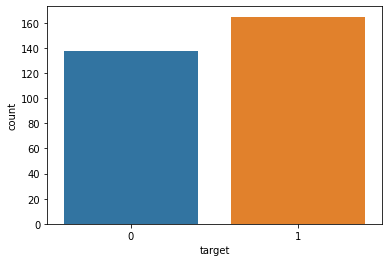

In [14]:
#eksplorasi data analisis(EDA)
#1. analisis variable target
y = dataset["target"]
sns.countplot(y)
target_temp = dataset.target.value_counts()

print(target_temp)

Dapat dilihat target dengan value 1 lebih tinggi dibandingkan dengan value 0

In [15]:
print("Persentasi pasien dengan jantung tidak masalah: "+str(round(target_temp[0]*100/303,2))+"%")
print("Persentasi pasien dengan jantung tidak masalah: "+str(round(target_temp[1]*100/303,2))+"%")


Persentasi pasien dengan jantung tidak masalah: 45.54%
Persentasi pasien dengan jantung tidak masalah: 54.46%


In [16]:
#analitik berdasarkan variable jenis kelamin
dataset["sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

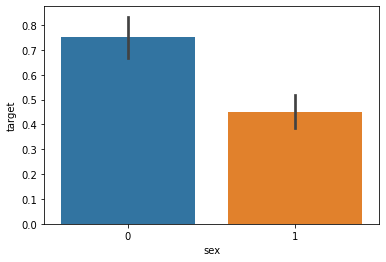

In [17]:
sns.barplot(dataset["sex"],y)

In [18]:
#Menganalisis ciri 'Sakit Dada'(CP)
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='cp', ylabel='target'>

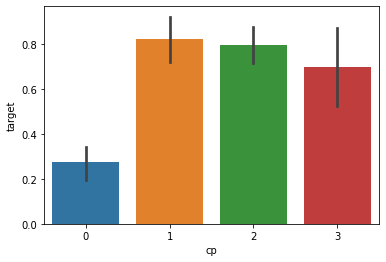

In [19]:
sns.barplot(dataset["cp"],y)

In [20]:
#Menganalisis ciri FBS
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [21]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

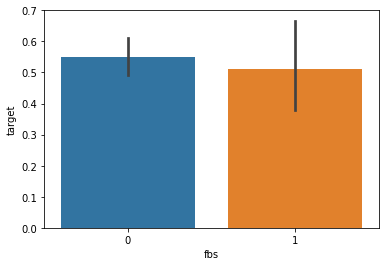

In [22]:
sns.barplot(dataset["fbs"],y)

In [23]:
#Menganalisis ciri restecg
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

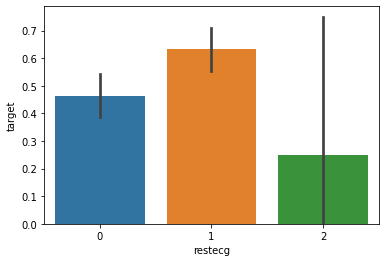

In [24]:
sns.barplot(dataset["restecg"],y)

Kami menyedari bahawa orang yang mempunyai restecg '1' dan '0' lebih cenderung untuk mempunyai penyakit jantung daripada dengan restecg '2'

In [25]:
#Menganalisis ciri 'exang' 
dataset["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

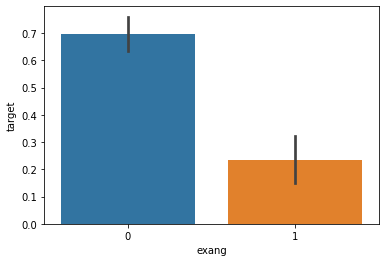

In [26]:
sns.barplot(dataset["exang"], y)

#Orang yang menghidap exang=1 iaitu senaman angina yang disebabkan oleh angina lebih cenderung untuk mempunyai masalah jantung.

In [27]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

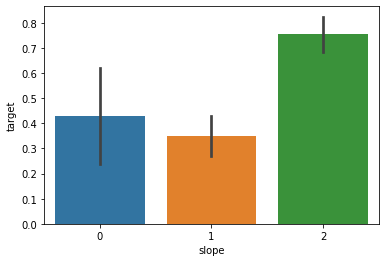

In [28]:
sns.barplot(dataset["slope"],y)

perhatikan, bahawa Cerun '2' menyebabkan sakit jantung lebih daripada Cerun '0' dan '1'

In [29]:
#Menganalisis ciri 'ca'
#number kapal utama (0-3) diwarnai flourosopy

In [30]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

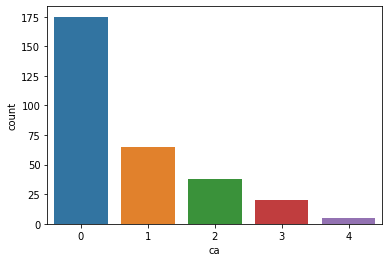

In [31]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

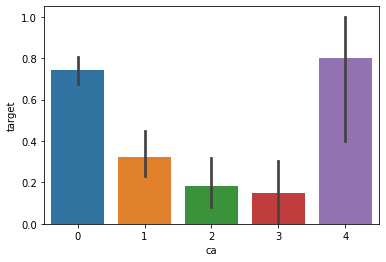

In [32]:

sns.barplot(dataset["ca"],y)

ca=4 mempunyai bilangan pesakit jantung yang banyak

In [33]:
### Menganalisis ciri 'thal'
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

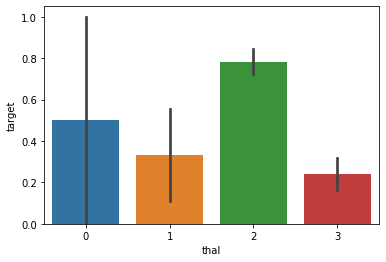

In [34]:
sns.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

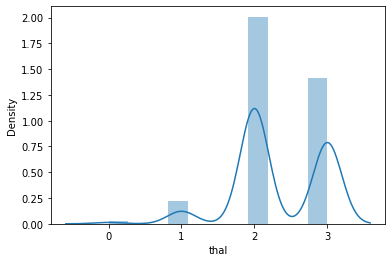

In [35]:
sns.distplot(dataset["thal"])

Split (train/test)

In [36]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [37]:
X_train.shape

(242, 13)

In [38]:
X_test.shape

(61, 13)

In [39]:
Y_train.shape

(242,)

In [40]:

Y_test.shape

(61,)

##Cretae model##

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression #regresi logistik

In [42]:
#regresi logistik implementasi
lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [43]:
Y_pred_lr.shape

(61,)

In [44]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("Skor ketepatan yang dicapai menggunakan Regresi Logistik adalah: "+str(score_lr)+" %")

Skor ketepatan yang dicapai menggunakan Regresi Logistik adalah: 85.25 %


In [45]:
from sklearn.naive_bayes import GaussianNB # Naive Bayes

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [46]:
Y_pred_nb.shape

(61,)

In [47]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("Skor ketepatan yang dicapai menggunakan  Naive Bayes adalah: "+str(score_nb)+" %")

Skor ketepatan yang dicapai menggunakan  Naive Bayes adalah: 85.25 %


SVM

In [73]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape

(61,)

In [74]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("Skor ketepatan yang dicapai menggunakan  SVM adalah: "+str(score_svm)+" %")

Skor ketepatan yang dicapai menggunakan  SVM adalah: 81.97 %


K Nearest Neighbors

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape

(61,)

In [76]:

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("Skor ketepatan yang dicapai menggunakan  SVM adalah: "+str(score_knn)+" %")

Skor ketepatan yang dicapai menggunakan  SVM adalah: 67.21 %


Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)

(61,)


In [69]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("Skor ketepatan yang dicapai menggunakan Decision Tree adalah: "+str(score_dt)+" %")

Skor ketepatan yang dicapai menggunakan Decision Tree adalah: 81.97 %


Random Forest


In [68]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(1000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [71]:
Y_pred_rf.shape

(61,)

In [72]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("Skor ketepatan yang dicapai menggunakan Random Forest adalah: "+str(score_rf)+" %")

Skor ketepatan yang dicapai menggunakan Random Forest adalah: 90.16 %


XGBoost(Extra Gradien Boosting)

In [78]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_xgb.shape

[20:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(61,)

In [79]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("Skor ketepatan yang dicapai menggunakan XGBoost adalah: "+str(score_xgb)+" %")

Skor ketepatan yang dicapai menggunakan XGBoost adalah: 78.69 %


Neural Network

In [56]:
#!pip3 install tensorflow
import sys

from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
model.fit(X_train,Y_train,epochs=1000)

Epoch 1/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7645
Epoch 2/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7562
Epoch 3/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.4862 - accuracy: 0.7645
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.7686
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7603
Epoch 6/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.7562
Epoch 7/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.7686
Epoch 8/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7645
Epoch 9/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.7686
Epoch 10/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7562
Epoch 11/1000
8/8 [

In [83]:

Y_pred_nn = model.predict(X_test)

In [84]:
Y_pred_nn.shape

(61, 1)

In [85]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [86]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("Skor ketepatan yang dicapai menggunakan Neural Network adalah: "+str(score_nn)+" %")

Skor ketepatan yang dicapai menggunakan Neural Network adalah: 83.61 %


In [87]:

scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("sckor akurasi yang dicapai oleh algoritma "+algorithms[i]+" adalah: "+str(scores[i])+" %")

sckor akurasi yang dicapai oleh algoritma Logistic Regression adalah: 85.25 %
sckor akurasi yang dicapai oleh algoritma Naive Bayes adalah: 81.97 %
sckor akurasi yang dicapai oleh algoritma Support Vector Machine adalah: 81.97 %
sckor akurasi yang dicapai oleh algoritma K-Nearest Neighbors adalah: 67.21 %
sckor akurasi yang dicapai oleh algoritma Decision Tree adalah: 81.97 %
sckor akurasi yang dicapai oleh algoritma Random Forest adalah: 90.16 %
sckor akurasi yang dicapai oleh algoritma XGBoost adalah: 78.69 %
sckor akurasi yang dicapai oleh algoritma Neural Network adalah: 83.61 %


##Kesimpulan##

##Kesimpulan##
Tujuan keseluruhannya adalah untuk menentukan berbagai teknik penambangan data yang berguna dalam prediksi penyakit jantung yang efektif. 
Prediksi yang efisien dan akurat dengan jumlah atribut dan pengujian yang lebih sedikit adalah tujuan kami. Dalam penelitian ini, saya hanya mempertimbangkan 14 atribut penting. Saya menerapkan empat teknik klasifikasi data mining, Logistic Regression, Naive Bayes, Support Vector Machine,K-Nearest Neighbors, Decision Tree, Random Forest, XGBoost dan Neural Network. Data tersebut diolah terlebih dahulu dan kemudian digunakan dalam modelLogistic Regression, Naive Bayes, Support Vector Machine,K-Nearest Neighbors, Decision Tree, Random Forest, XGBoost dan Neural Network adalah algoritma yang menunjukkan hasil terbaik dalam model ini. Saya menemukan akurasi tertinggi pada random forest sebesar 90.16%. Kami selanjutnya dapat memperluas penelitian ini dengan menggabungkan teknik penambangan data lainnya seperti deret waktu, aturan pengelompokan dan asosiasi, mesin vektor pendukung, dan algoritma genetika. Diperlu menerapkan model yang lebih kompleks dan kombinasi untuk mendapatkan akurasi yang lebih tinggi untuk prediksi awal penyakit jantung.